### Workshop 13 DAB July 2025 KM
### Creating Custom Visualizations with Seaborn

In [1]:
# =============================================================================
# ADVANCED SEABORN CHALLENGE 
# =============================================================================
# This code creates an executive dashboard using CSV files from the week 9 Workshop:
# - customers.csv (100 customers)
# - products.csv (60 products) 
# - sales.csv (150 transactions)
#
# LEARNING OBJECTIVES:
# - Create multi-panel dashboards using subplots
# - Use different seaborn chart types effectively
# - Apply professional styling and labeling
# - Analyze real business data through visualization
# =============================================================================

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [ ]:
# =============================================================================
# DATA LOADING AND PREPARATION
# =============================================================================
# STEP 1: Load your data
# Always start by loading your CSV files and checking what you have
# Tip: Use len() to see how many rows you have in each dataset

print("📊 Loading workshop data...")

In [14]:
#A. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")

#B. Create a dictionary of dataframes
dataframes = {file: pd.read_csv(file) for file in csv_files}

#C. Assign dataframes
customers= dataframes['customers.csv']
products= dataframes['products.csv']
sales= dataframes['sales.csv']

#d. Display the first few rows of each DataFrame
print("📊 Loading workshop data...")
print(f"✅ Data loaded successfully:")
print(f"   - {len(customers)} customers")
print(f"   - {len(products)} products") 
print(f"   - {len(sales)} sales transactions")

📊 Loading workshop data...
✅ Data loaded successfully:
   - 100 customers
   - 60 products
   - 150 sales transactions


In [17]:
# See all keys (file names)
print(dataframes.keys())

dict_keys(['customers.csv', 'products.csv', 'sales.csv'])


In [19]:
# STEP 2: Prepare date columns for analysis
# Convert string dates to datetime objects so we can extract day names, months, etc.
# Pandas to_datetime() function is your friend here!

customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

# check if update worked
print (customers.dtypes)
print (products.dtypes)
print (sales.dtypes)



customer_id                   int64
first_name                   object
last_name                    object
age                           int64
state                        object
income                        int64
registration_date    datetime64[ns]
email                        object
dtype: object
product_id               int64
product_name            object
category                object
price                  float64
launch_date     datetime64[ns]
brand                   object
dtype: object
sale_id                      int64
customer_id                  int64
product_id                   int64
transaction_date    datetime64[ns]
quantity                     int64
total_amount               float64
dtype: object


In [24]:
# STEP 3: Extract useful information from dates
# We want to analyze patterns by day of the week, so extract day names
# Hint: Use .dt.day_name() to get 'Monday', 'Tuesday', etc.
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_of_week'] = sales['transaction_date'].dt.dayofweek
sales['day_name'] = sales['transaction_date'].dt.day_name()

# check if update worked for year
sales['year'].head()


0    2022
1    2022
2    2022
3    2022
4    2022
Name: year, dtype: int32

In [25]:
# check if update worked for month
sales['month'].head()

0    2
1    2
2    2
3    2
4    3
Name: month, dtype: int32

In [26]:
# check if update worked day of wk
sales['day_of_week'].head()

0    3
1    1
2    6
3    4
4    1
Name: day_of_week, dtype: int32

In [27]:
# check if update worked for day name
sales['day_name'].head()

0    Thursday
1     Tuesday
2      Sunday
3      Friday
4     Tuesday
Name: day_name, dtype: object

In [30]:
# Chart 1 Data: Revenue by product category
# We need to combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue
sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')
category_revenue = sales_with_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)

# display 
sales_with_category


,sale_id,customer_id,product_id,transaction_date,quantity,total_amount,year,month,day_of_week,day_name,category
0,1,1,1,2022-02-10 14:30:00,1,79.99,2022,2,3,Thursday,Electronics
1,2,2,3,2022-02-15 10:15:00,2,39.98,2022,2,1,Tuesday,Home & Garden
2,3,3,5,2022-02-20 16:45:00,1,34.99,2022,2,6,Sunday,Sports & Outdoors
3,4,4,2,2022-02-25 11:20:00,3,74.97,2022,2,4,Friday,Clothing
4,5,5,4,2022-03-01 13:10:00,1,89.99,2022,3,1,Tuesday,Accessories
...,...,...,...,...,...,...,...,...,...,...,...
145,146,86,30,2024-02-15 15:20:00,1,34.99,2024,2,3,Thursday,Accessories
146,147,87,32,2024-02-20 11:30:00,3,83.97,2024,2,1,Tuesday,Home & Garden
147,148,88,34,2024-02-25 13:45:00,2,109.98,2024,2,6,Sunday,Clothing
148,149,89,36,2024-03-01 16:15:00,1,29.99,2024,3,4,Friday,Sports & Outdoors


In [31]:
# chart 1 display
category_revenue

category
Sports & Outdoors    3544.64
Electronics          3524.29
Clothing             2745.39
Accessories          2053.25
Home & Garden        1541.46
Name: total_amount, dtype: float64

In [32]:
# Chart 2 Data: Customer count by state  
# Count how many customers are in each state
# Use value_counts() - it's perfect for counting occurrences!
state_customer_counts = customers['state'].value_counts()


In [33]:
# Chart 3 Data: Daily transaction patterns
# Calculate average transaction amount for each day of the week
# Define the order of days so our chart shows Monday through Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = sales.groupby('day_name')['total_amount'].mean().reindex(day_order)
# Fill any missing days with 0 (in case no transactions happened on certain days)
daily_avg_amount = daily_avg_amount.fillna(0)

In [34]:
# Chart 4 Data: Transaction amounts for distribution analysis
# We'll use this to create a histogram showing the spread of transaction values
transaction_amounts = sales['total_amount']

In [35]:
print(f"✅ Data preparation complete:")
print(f"   - {len(category_revenue)} product categories")
print(f"   - {len(state_customer_counts)} states represented")
print(f"   - Transaction range: ${transaction_amounts.min():.2f} - ${transaction_amounts.max():.2f}")

✅ Data preparation complete:
   - 5 product categories
   - 5 states represented
   - Transaction range: $12.99 - $319.98


In [37]:
# STEP 5: Set up professional styling
# Before creating charts, set a consistent style for the entire notebook
# sns.set_theme() controls the overall look of all your seaborn plots

# Choose a clean, professional style:
# - "whitegrid" gives a clean white background with subtle grid lines
# - "talk" context makes fonts and elements larger (good for presentations)
sns.set_theme(
    style="whitegrid",      # Clean white background with subtle grid lines
    context="talk"          # Larger fonts and elements for presentations
)

# Fine-tune some matplotlib settings for extra polish
# These settings make the charts look more professional
plt.rcParams.update({
    'figure.facecolor': 'white',        # White background for the entire figure
    'axes.facecolor': 'white',          # White background for each chart
    'font.family': 'DejaVu Sans',       # Professional, readable font
    'axes.spines.top': False,           # Remove top border (cleaner look)
    'axes.spines.right': False,         # Remove right border (cleaner look)
})

In [38]:
# =============================================================================
# CHALLENGE: EXECUTIVE SUMMARY DASHBOARD
# =============================================================================
# GOAL: Create a professional 2x2 dashboard showing key business metrics
# 
# DASHBOARD STRUCTURE:
# [Revenue by Category]  [Customers by State]
# [Daily Patterns]       [Transaction Distribution]
#
# KEY SKILLS: subplots, multiple chart types, professional styling
# =============================================================================

print("\n" + "=" * 60)
print("CHALLENGE: EXECUTIVE SUMMARY DASHBOARD")
print("=" * 60)

print("📊 Creating Executive Dashboard with actual workshop data...")

# Display key statistics first (always good to understand your data!)
print(f"\n📈 Workshop Data Overview:")
print(f"   • Total Revenue: ${sales['total_amount'].sum():,.2f}")
print(f"   • Average Transaction: ${sales['total_amount'].mean():.2f}")
print(f"   • Product Categories: {products['category'].nunique()}")
print(f"   • States Represented: {customers['state'].nunique()}")



CHALLENGE: EXECUTIVE SUMMARY DASHBOARD
📊 Creating Executive Dashboard with actual workshop data...

📈 Workshop Data Overview:
   • Total Revenue: $13,409.03
   • Average Transaction: $89.39
   • Product Categories: 5
   • States Represented: 5


In [ ]:
# STEP 1: Create the dashboard structure
# plt.subplots() creates multiple charts in one figure
# (2, 2) means 2 rows and 2 columns = 4 charts total
# figsize controls the overall size - larger numbers = bigger dashboard

# TODO: Create a 2x2 subplot structure with figsize=(15, 10)
# Hint: fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(?, ?, figsize=(?))

# YOUR CODE HERE

# TODO: Add a main title that spans the entire dashboard
# Hint: Use fig.suptitle() with appropriate fontsize and fontweight

In [59]:
# for chart 2: Customer Count by State Top 6
top_states = state_customer_counts.head(6)

top_states.head()

state
CA    20
NY    20
TX    20
FL    20
IL    20
Name: count, dtype: int64

In [42]:
# Color palatte for charts: blues, purples, greens
# had to modify on chart level due to warning on colors palatte creation

colors_bar = ["#4C72B0", "#6A5ACD", "#66C2A5", "#5DADE2", "#8E44AD"]
color_line = "#6A5ACD"       # purple
color_hist = "#4C72B0"       # blue
color_meanline = "#2ECC71"   # green

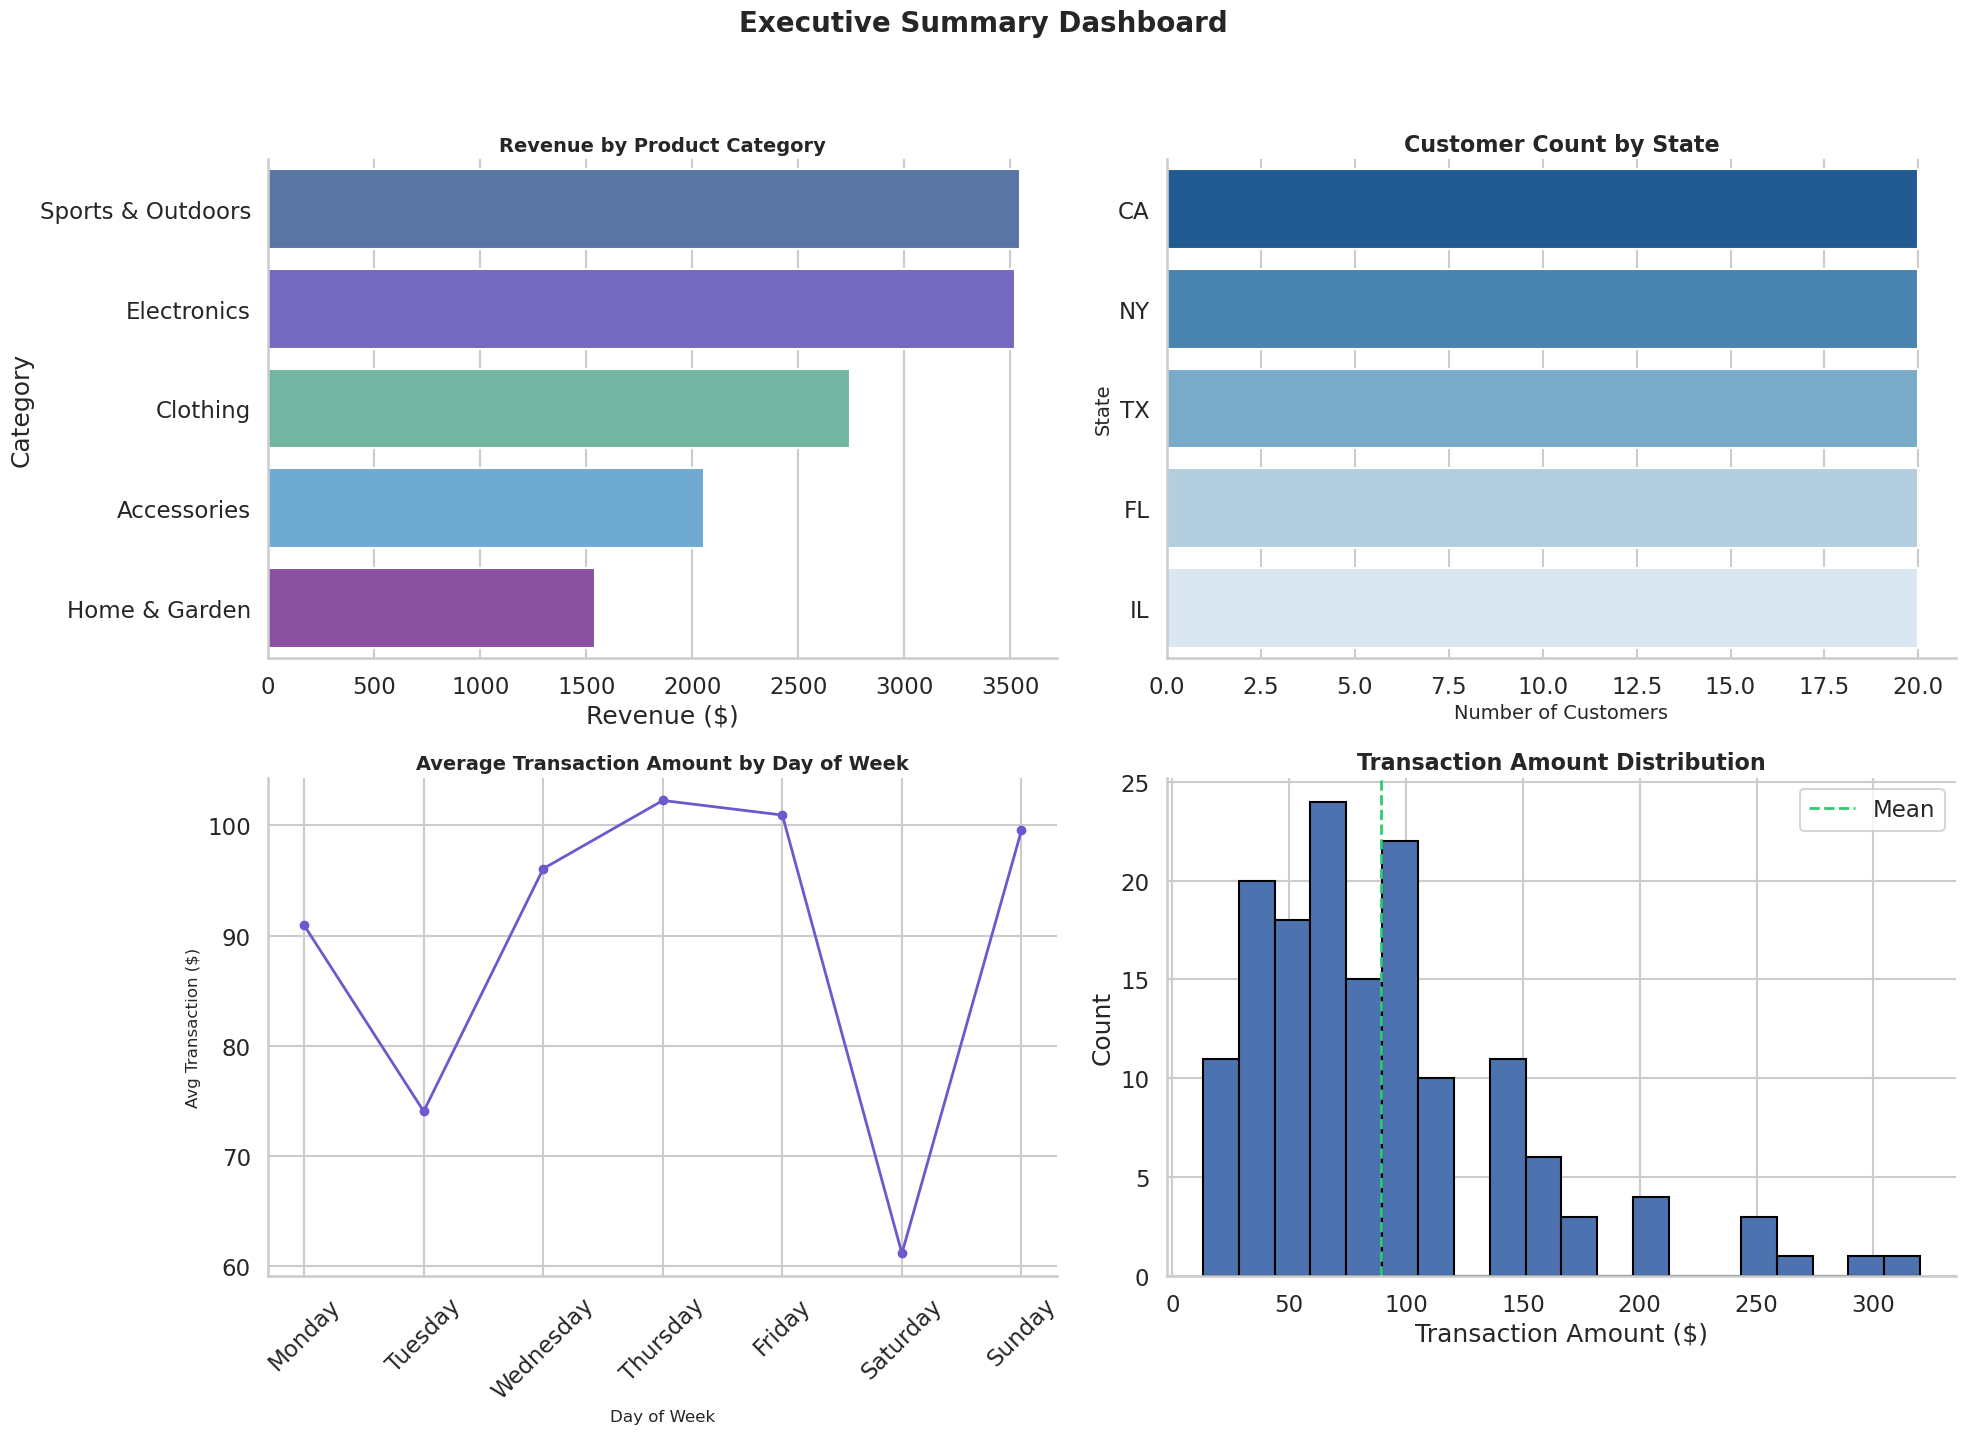

In [64]:
# create grid for plaots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

fig.suptitle(
    "Executive Summary Dashboard",
    fontsize=20,
    fontweight="bold",
    x=0.5,           
    y=1.03         
)

# CHART 1: Revenue by Category/ bar chart
ax1 = sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index,
    hue=category_revenue.index,     
    palette=colors_bar[:len(category_revenue)],
    legend=False,
    ax=ax1
)

ax1.set_title("Revenue by Product Category", fontsize=14, fontweight="bold")
ax1.set_xlabel("Revenue ($)")
ax1.set_ylabel("Category")


# CHART 2: Customer Count by State/ line chart top 3 vs bottom 3

state_customer_counts = customers['state'].value_counts().sort_values(ascending=True)

sns.barplot(
    x=state_customer_counts.values,
    y=state_customer_counts.index,
    hue=state_customer_counts.index,
    palette="Blues_r",
    legend=False,
    ax=ax2
)

ax2.set_title("Customer Count by State", fontsize=16, fontweight="bold")
ax2.set_xlabel("Number of Customers", fontsize=14)
ax2.set_ylabel("State", fontsize=14)



# CHART 3: Daily Transactional /line chart
ax3.plot(
    range(len(daily_avg_amount)),
    daily_avg_amount.values,
    marker='o',
    linewidth=2,
    markersize=6,
    color=color_line
)
# Titles and labels
ax3.set_title("Average Transaction Amount by Day of Week", fontsize=14, fontweight="bold")
ax3.set_xlabel("Day of Week", fontsize=12)
ax3.set_ylabel("Avg Transaction ($)", fontsize=12)

ax3.set_xticks(range(len(day_order)))
ax3.set_xticklabels(day_order, rotation=45)



# CHART 4: Transaction Amount Distribution /Histogram
ax4.hist(
    sales["total_amount"],
    bins=20,
    edgecolor="black",
    color=color_hist 
)

# Mean line
ax4.axvline(
    sales["total_amount"].mean(),
    color= color_meanline,   
    linestyle= "--",
    linewidth=2,
    label="Mean"
)

ax4.set_title("Transaction Amount Distribution", fontsize=16, fontweight="bold")
ax4.set_xlabel("Transaction Amount ($)")
ax4.set_ylabel("Count")
ax4.legend()

# display
plt.tight_layout()

plt.show()